# Probability and Statistics
:label:`sec_prob`

## Section Summary

This section discusses the importance of probability and statistics in machine learning, which deals with uncertainty. In supervised learning, models aim to predict unknown targets given known features, while unsupervised learning often involves determining the likelihood of observing values in a population of interest. Bayesian probability is used to describe the degrees of belief in non-repeatable events, and statistics allows us to reason backward, starting from collected data to make inferences about the process that generated the data. 

Sampling data from an unknown probability distribution can help estimate the parameters of the data generating distribution. However, this can be slow, and machine learning requires a large amount of data to make further gains. We also learn about conditional probabilities and Bayes' theorem, which is useful for decoupling information conveyed by data through a likelihood term that addresses how well observations match a choice of parameters and a prior probability that governs how plausible a choice of parameters is.

In [1]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

## A Simple Example: Tossing Coins



In [45]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(100)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [50, 50]


In [27]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([50., 50.])

In [48]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5000, 0.5000])

In [151]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.5000, 0.5000])

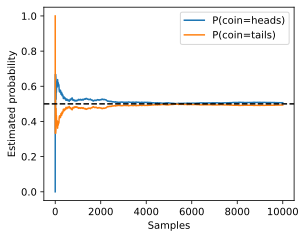

In [158]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();